In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We define the root finding algorithm using Newton's Method
    
def newton(f, fd, x0, e, max_iter=100):
    """
    f: the function we are finding root for, i.e., we are looking for roots of f(x)=0
    fd: the derivative of f, given f a differentiable function
    x0: initial point for the iteration
    e: error, i.e., we are finding root satisfying |x-x0|<= e
    max_iter: maximum number of iteration allowed
    """
    x_history = [x0]
    for iteration in range(max_iter):
        x = x_history[-1]
        if abs(f(x)) > e:
            x_new = x - f(x)/fd(x)
            x_history.append(x_new)
        elif iteration == max_iter-1:
            print('Exceed maximum iteration, we failed to find a solution.')
            return None
        else:
            #print('We find the root x =', x, 'after', iteration+1, 'iteration(s).')
            return x, iteration
            


### Question 6

In [3]:
# We plug in the function by hand

f = lambda x: 4.81*x**2-10.8*x
fd = lambda x: 4.81*2*x-10.8

# We use the Newton's method to find the root, we set x0 to be relatively big to avoid the trivial solution x=0
root, iteration = newton(f, fd, 3, 1e-6)
print('We find the root x =', root, 'after', iteration+1, 'iteration(s).')

We find the root x = 2.245322245899708 after 5 iteration(s).


The intersection point we find is ( 2.245322245899708 , 1.3264033262300876 ).


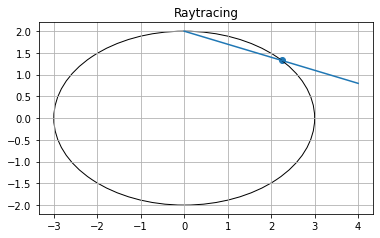

In [4]:
# Visulization
from matplotlib.patches import Ellipse

# Plot the ellipse
a = 3
b = 2
ell = Ellipse(xy=[0, 0], width=2*a, height=2*b, fill=False)
fig, ax = plt.subplots()
ax.add_patch(ell)
ax.set_aspect('equal')
ax.autoscale()

# Plot the ray
# (x0, y0) is the starting point of the ray and (u0, v0) is the direction of the ray
x0 = 0
y0 = 2
u0 = 1
v0 = -0.3

t = np.linspace(0, 4, 200)
xs = x0 + u0*t
ys = y0 + v0*t
plt.plot(xs, ys)

y = lambda x: ((x-x0)/u0)*v0+y0
y_root = y(root)
plt.scatter(root, y_root)
print('The intersection point we find is (', root, ',', y_root, ').')

plt.title('Raytracing')
plt.grid()
plt.show()

### Question7

In [5]:
from sympy import *
x = Symbol('x')

def f(a, b, x0, y0, u0, v0):
    y = ((x-x0)/u0)*v0+y0
    return ((x)/a)**2+((y)/b)**2-1

def fd(f):
    return f.diff(x)

def compute_unit_norm(a, b, x, y):
    n = [(b/a)*x,(a/b)*y]
    norm = (n[0]**2+n[1]**2)**(1/2)
    n[0] = n[0]/norm
    n[1] = n[1]/norm
    return n

def compute_unit_ray(u, v):
    norm = (u**2+v**2)**(1/2)
    return [u/norm, v/norm]

def update_ray_vector(w, n):
    dot_product = w[0]*n[0]+w[1]*n[1]
    v1 = w[0]-2*dot_product*n[0]
    v2 = w[1]-2*dot_product*n[1]
    return [v1, v2]

def main():
    x0, y0 = 0, 2
    u0, v0 = 1, -0.3
    
    x_history = [x0]
    y_history = [y0]
    u = u0
    v = v0
    
    for i in range(50):
        x_cur = x_history[-1]
        y_cur = y_history[-1]
        
        fn = f(3, 2, x_cur, y_cur, u, v)
        fprime = fd(fn)
        fn = lambdify(x, fn)
        fprime = lambdify(x, fprime)
        
        if u > 0:
            x_st = 4
        else:
            x_st = -4
        
        root,i = newton(fn, fprime, x_st, 1e-10)
        
        y_root = ((root-x_cur)/u)*v+y_cur
        
        x_history.append(root)
        y_history.append(y_root)
        
        n = compute_unit_norm(3, 2, root, y_root)
        w = compute_unit_ray(u, v)
        
        updated_ray = update_ray_vector(w, n)
        u = updated_ray[0]
        v = updated_ray[1]
        
    return x_history, y_history

x_history, y_history = main()

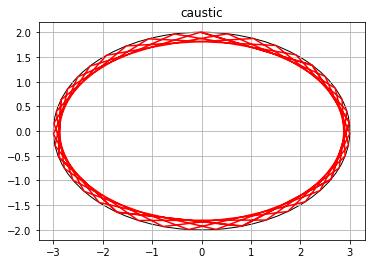

In [6]:
# Visualization

from matplotlib.patches import Ellipse

# Plot the ellipse
a = 3
b = 2
ell = Ellipse(xy=[0, 0], width=2*a, height=2*b, fill=False)
fig, ax = plt.subplots()
ax.add_patch(ell)
ax.set_aspect('equal')
ax.autoscale()

# Plot the rays by connecting each point calculated
plt.plot(x_history, y_history, c='r')

plt.title('caustic')
plt.grid()
plt.show()